In [20]:
import json
from datetime import datetime
import kragle as kg
import sys
import pandas as pd
import math
import numpy as np
import scipy.stats as st
import statsmodels.stats.api as sms
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
LOAD_DATA_QUERY = '''
    SELECT
        profile_id,
        connected_profile_id,
        cos_sim
    FROM
        rmatai.profile_viewing_cosine_FR_new
    LIMIT %i
'''

load_data_query = (LOAD_DATA_QUERY) % (10000)

print(load_data_query)


    SELECT
        profile_id,
        connected_profile_id,
        cos_sim
    FROM
        rmatai.profile_viewing_cosine_FR_new
    LIMIT 10000



In [22]:
all_data = kg.genie.SparkSqlJob() \
    .script(load_data_query) \
    .version('2.3.2') \
    .job_name('CosineSimilarity') \
    .execute() \
    .pandas()
print('Extraction complete.')

INFO 2020-06-07 03:07:05,323 pensive.py(89) Going to fetch result from pensive server: https://pensiveserver.prod.netflix.net/api/v1/gaze/f6d96420-a86b-11ea-a1e9-0ee1df857b87?wait_for_failure=False&wait_for_history_file=False&refresh_cache=False


Extraction complete.


In [23]:
all_data.head(5)

,0,1,2
0,792825885527464903,792825377421175996,0.339539
1,792825885527464903,216374448298988555,0.319654
2,792825885527464903,792833484203371806,0.068237
3,792825885527464903,792835201184336792,0.151582
4,792825885527464903,936947466103985598,0.634389


In [24]:
all_data.rename({0: 'profile_id1',
                 1: 'profile_id2',
                 2: 'cosine_similarity'},
                axis=1, inplace=True)

In [25]:
all_data.head(5)

,profile_id1,profile_id2,cosine_similarity
0,792825885527464903,792825377421175996,0.339539
1,792825885527464903,216374448298988555,0.319654
2,792825885527464903,792833484203371806,0.068237
3,792825885527464903,792835201184336792,0.151582
4,792825885527464903,936947466103985598,0.634389


[0.         0.02581832 0.05163664 0.07745496 0.10327328 0.1290916
 0.15490992 0.18072824 0.20654656 0.23236488 0.25818321 0.28400153
 0.30981985 0.33563817 0.36145649 0.38727481 0.41309313 0.43891145
 0.46472977 0.49054809 0.51636641 0.54218473 0.56800305 0.59382137
 0.61963969 0.64545801 0.67127633 0.69709465 0.72291298 0.7487313
 0.77454962 0.80036794 0.82618626 0.85200458 0.8778229  0.90364122
 0.92945954 0.95527786]


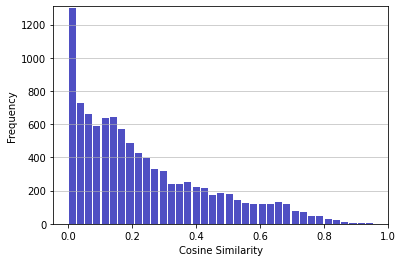

In [29]:
n, bins, patches = plt.hist(x=all_data['cosine_similarity'], 
                            bins='auto', 
                            color='#0504aa',
                            alpha=0.7, 
                            rwidth=0.85)
print(bins)
plt.grid(axis='y', alpha=0.75)

plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')

# Set a clean upper y-axis limit.
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

fig_name = 'cosine_distribution.png'
plt.savefig(fig_name)

plt.show()

In [28]:
import zipfile as zf
files = zf.ZipFile("Adjlist_FR.tsv.zip", 'r')
files.extractall('directory to extract')
files.close()